In [1]:
%load_ext autoreload
%autoreload 2

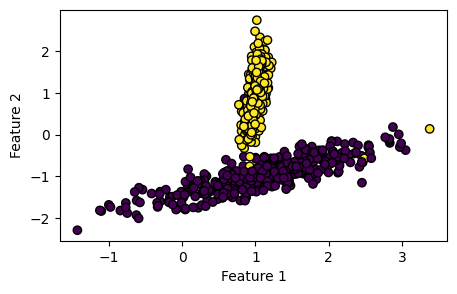

Accuracy: 0.97. F1: 0.97


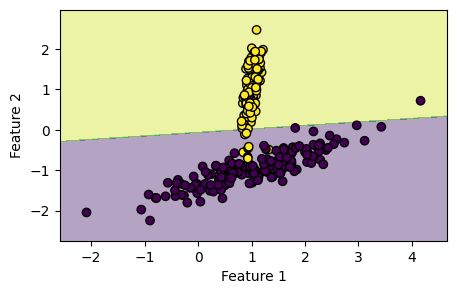

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import functional as F
from basics import LogisticRegression

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(5, 3))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy, f1 = F.accuracy(y_test, y_pred), F.f1(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}. F1: {f1:.2f}')

plt.figure(figsize=(5, 3))
plot_decision_boundary(model, X_test, y_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
